In [1]:
# 📦 Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# ✅ Step 2: Load the dataset (use raw string or double backslashes)
file_path = r'C:\Users\adita\OneDrive\Desktop\Learnathon 4.0\Learnathon-4.0\Datasets\Auto_Insurance_Fraud_Claims_File01.csv'
df = pd.read_csv(file_path)


In [3]:

# -----------------------------
# 1. Basic Info
# -----------------------------
print("✅ Dataset Shape:", df.shape)
print("\n🧾 Column Names:\n", df.columns.tolist())
print("\n📌 Data Types:\n")
print(df.dtypes)
print("\n🔍 Sample Data:\n")
print(df.head())


✅ Dataset Shape: (40000, 53)

🧾 Column Names:
 ['Claim_ID', 'Bind_Date1', 'Customer_Life_Value1', 'Age_Insured', 'Policy_Num', 'Policy_State', 'Policy_Start_Date', 'Policy_Expiry_Date', 'Policy_BI', 'Policy_Ded', 'Policy_Premium', 'Umbrella_Limit', 'Insured_Zip', 'Gender', 'Education', 'Occupation', 'Hobbies', 'Insured_Relationship', 'Capital_Gains', 'Capital_Loss', 'Garage_Location', 'Accident_Date', 'Accident_Type', 'Collision_Type', 'Accident_Severity', 'authorities_contacted', 'Acccident_State', 'Acccident_City', 'Accident_Location', 'Accident_Hour', 'Num_of_Vehicles_Involved', 'Property_Damage', 'Bodily_Injuries', 'Witnesses', 'Police_Report', 'DL_Expiry_Date', 'Claims_Date', 'Auto_Make', 'Auto_Model', 'Auto_Year', 'Vehicle_Color', 'Vehicle_Cost', 'Annual_Mileage', 'DiffIN_Mileage', 'Low_Mileage_Discount', 'Fraud_Ind', 'Commute_Discount', 'Total_Claim', 'Injury_Claim', 'Property_Claim', 'Vehicle_Claim', 'Vehicle_Registration', 'Check_Point']

📌 Data Types:

Claim_ID               


❓ Missing Values:

authorities_contacted     3600
Police_Report            13716
dtype: int64


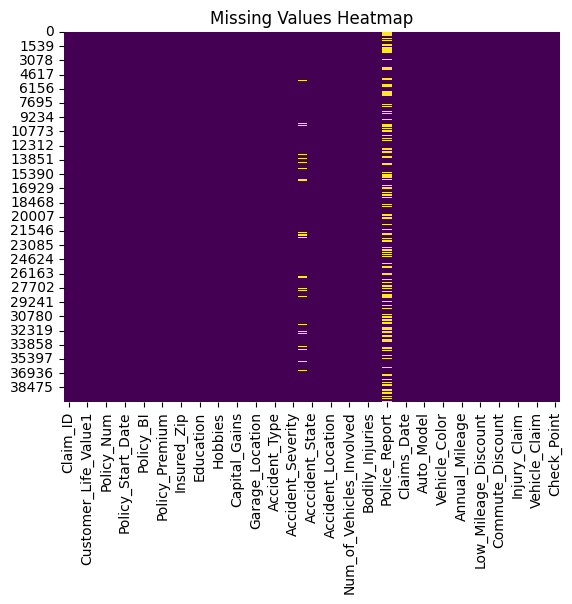

In [4]:

# -----------------------------
# 2. Missing Values
# -----------------------------
print("\n❓ Missing Values:\n")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [5]:

# -----------------------------
# 3. Duplicates
# -----------------------------
duplicate_count = df.duplicated().sum()
print(f"\n📌 Duplicate Rows: {duplicate_count}")




📌 Duplicate Rows: 0


In [6]:
# -----------------------------
# 4. Summary Statistics
# -----------------------------
print("\n📊 Summary Statistics (Numerical Features):\n")
print(df.describe())




📊 Summary Statistics (Numerical Features):

       Customer_Life_Value1  Age_Insured    Policy_Num    Policy_Ded  \
count          40000.000000  40000.00000  4.000000e+04  40000.000000   
mean              17.999275     38.94535  1.550135e+08   1135.162500   
std                3.745481      9.13496  2.599983e+07    611.082387   
min               12.000000     19.00000  1.111789e+08    500.000000   
25%               15.000000     32.00000  1.316976e+08    500.000000   
50%               18.000000     38.00000  1.546168e+08   1000.000000   
75%               21.000000     44.00000  1.779575e+08   2000.000000   
max               24.000000     64.00000  1.999475e+08   2000.000000   

       Policy_Premium  Umbrella_Limit    Insured_Zip  Capital_Gains  \
count    40000.000000    4.000000e+04   40000.000000   40000.000000   
mean      1255.966808    1.094800e+06  501415.969600   25113.682500   
std        245.683878    2.282607e+06   71712.898932   27759.502153   
min        433.330000 

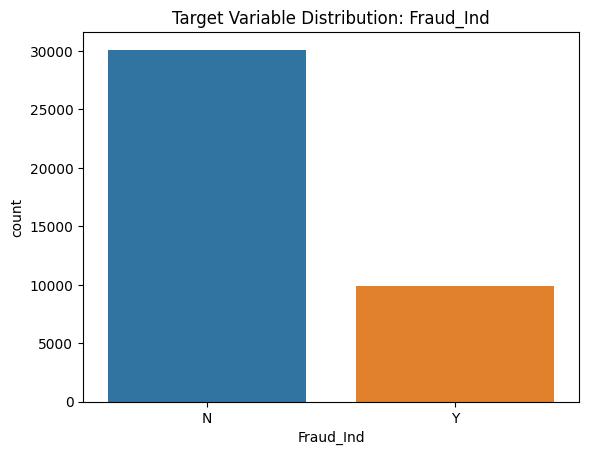


🎯 Value Counts:
 Fraud_Ind
N    0.753
Y    0.247
Name: proportion, dtype: float64


In [7]:
# -----------------------------
# 5. Target Variable Distribution (Assuming 'Fraud_Ind')
# -----------------------------
if 'Fraud_Ind' in df.columns:
    sns.countplot(x='Fraud_Ind', data=df)
    plt.title("Target Variable Distribution: Fraud_Ind")
    plt.show()
    print("\n🎯 Value Counts:\n", df['Fraud_Ind'].value_counts(normalize=True))



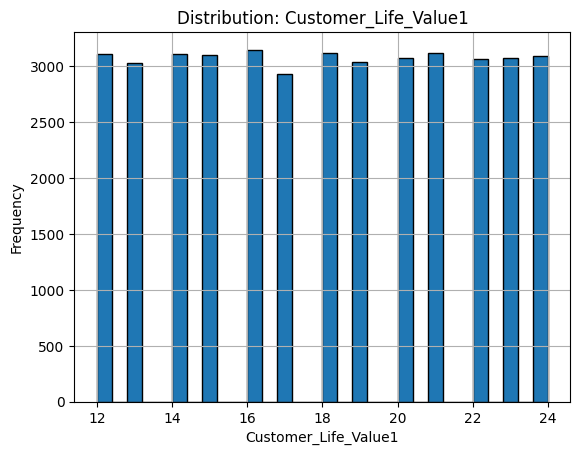

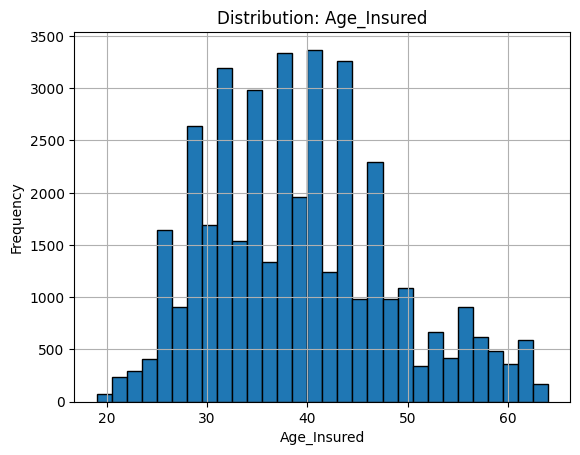

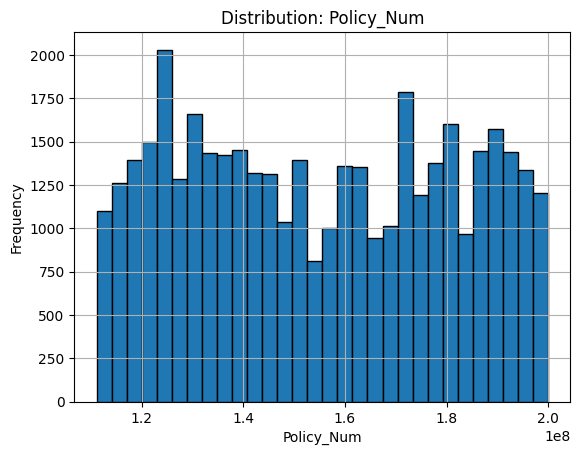

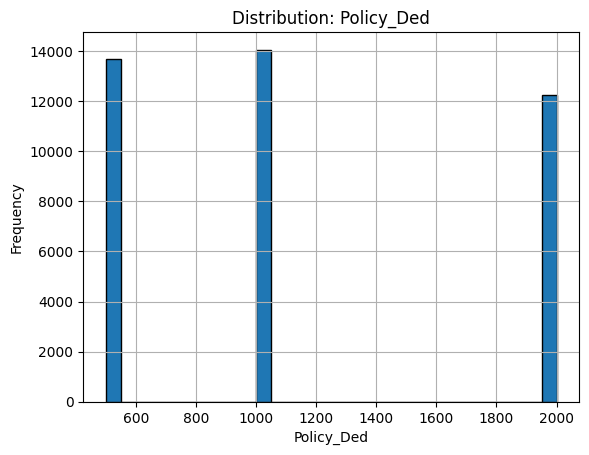

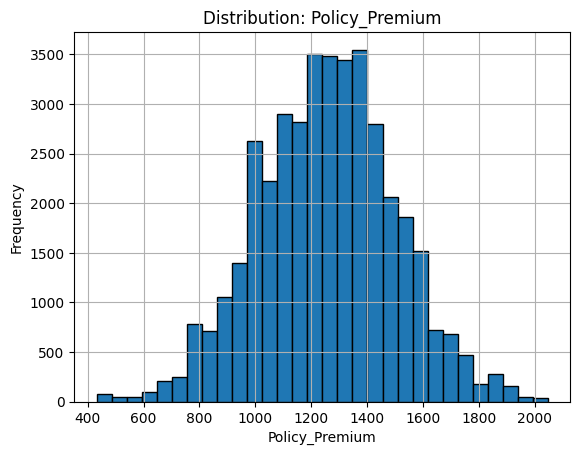

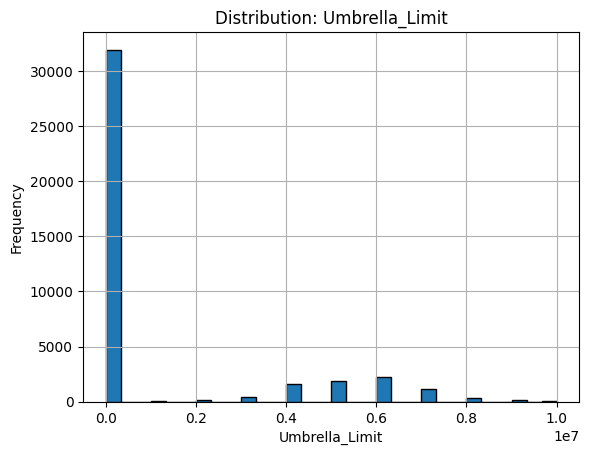

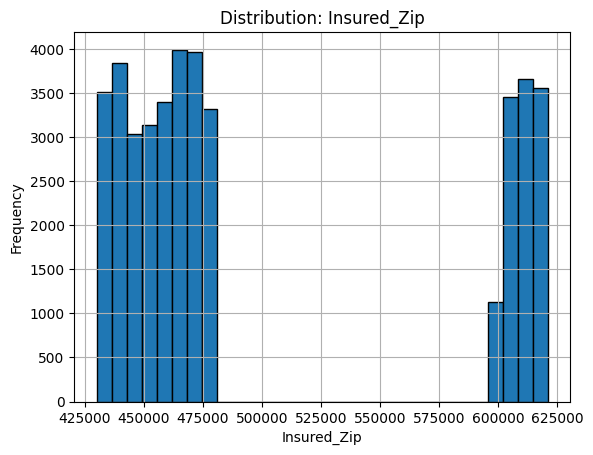

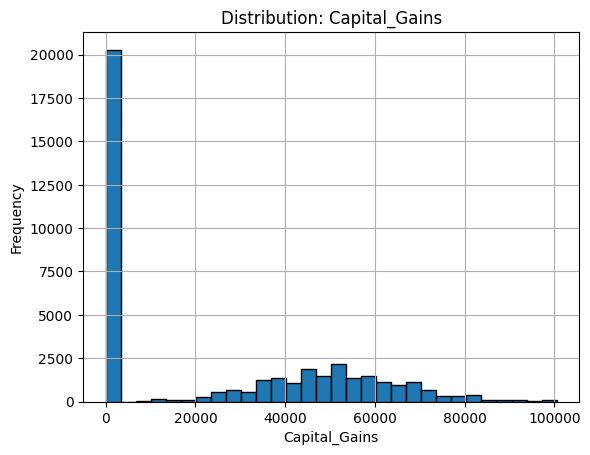

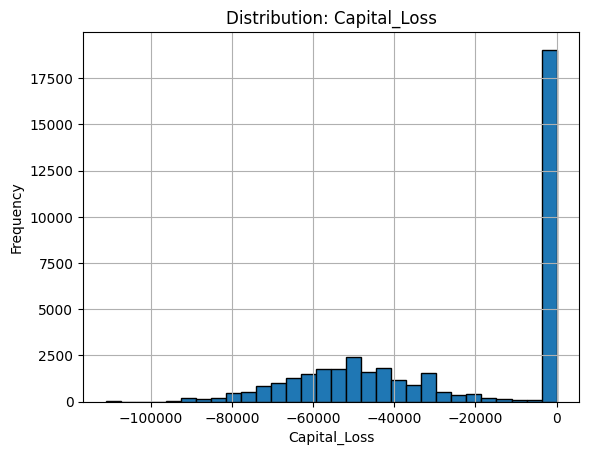

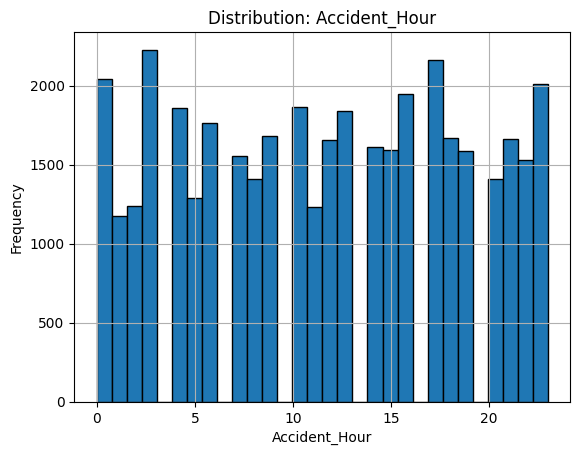

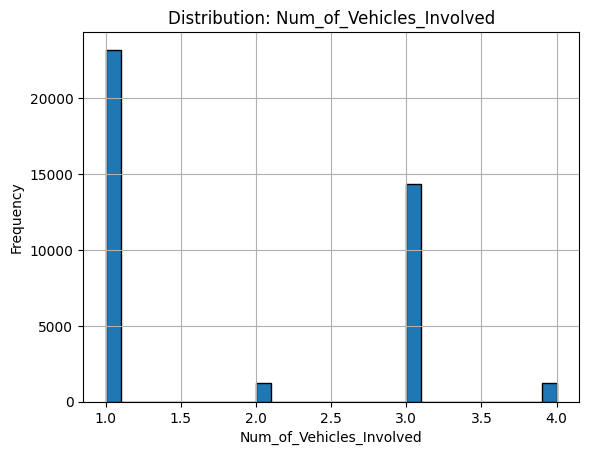

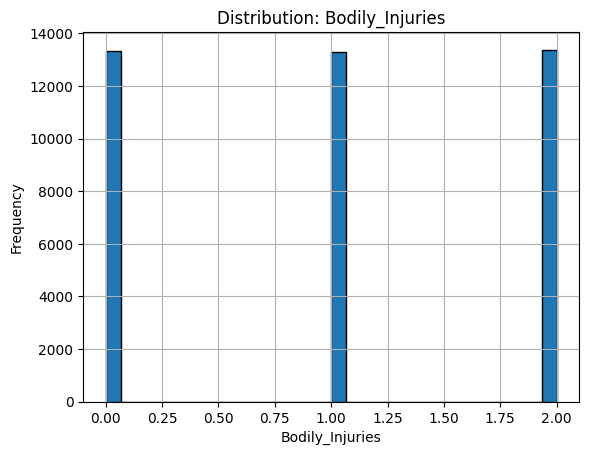

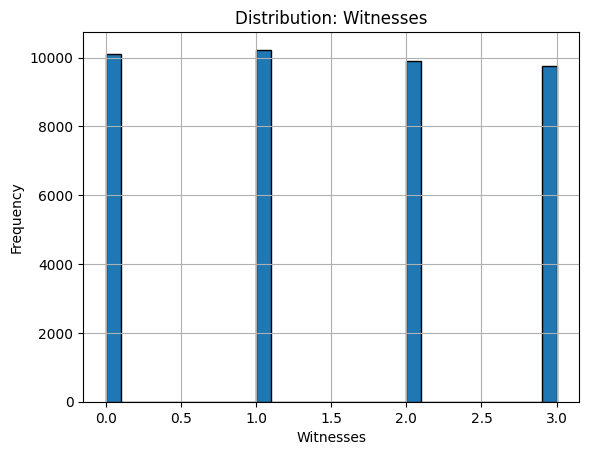

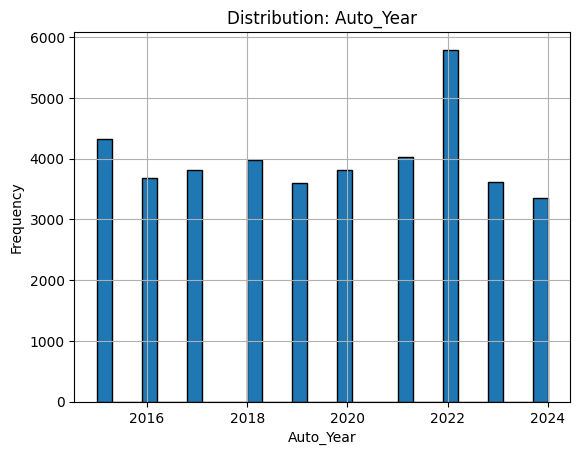

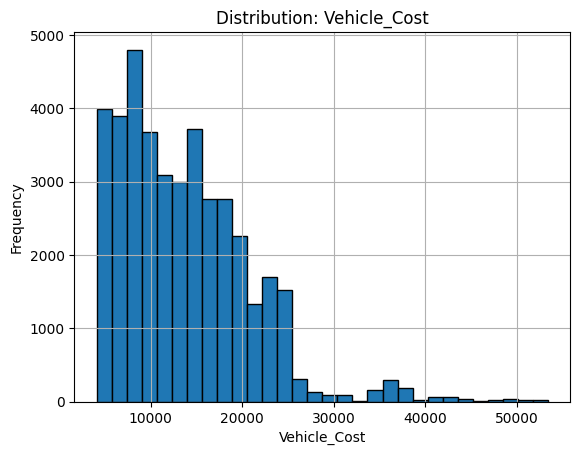

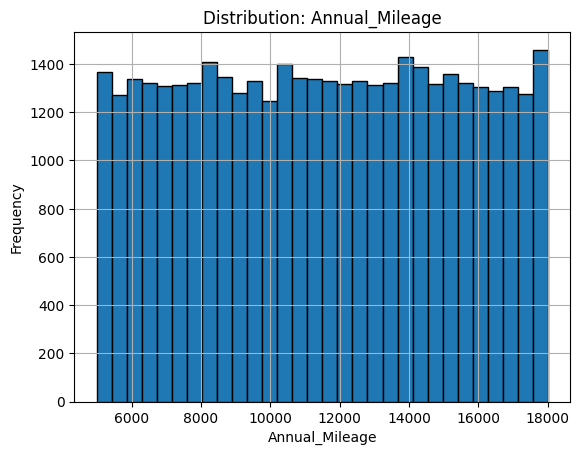

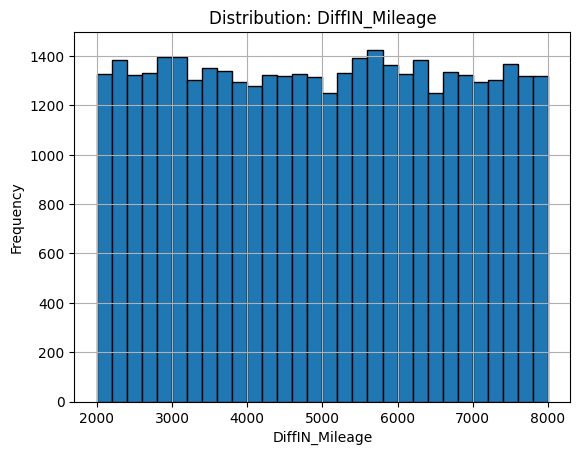

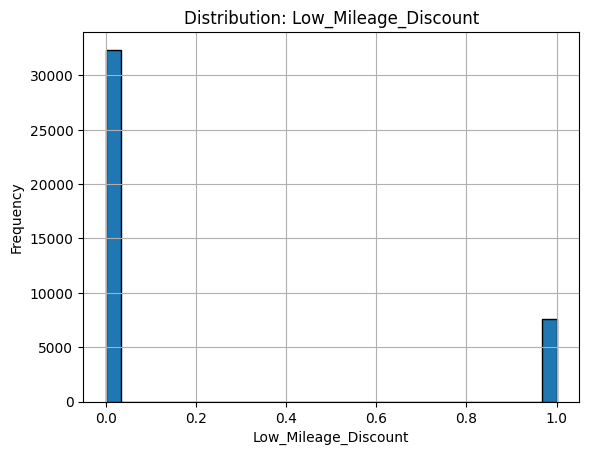

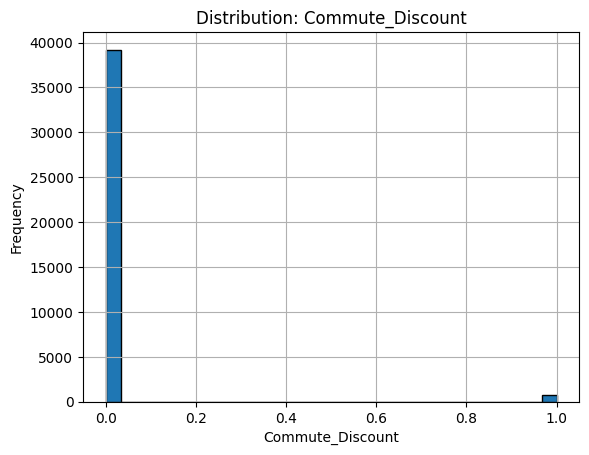

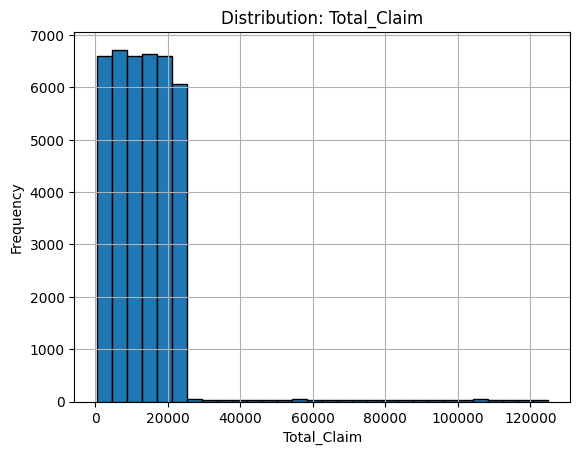

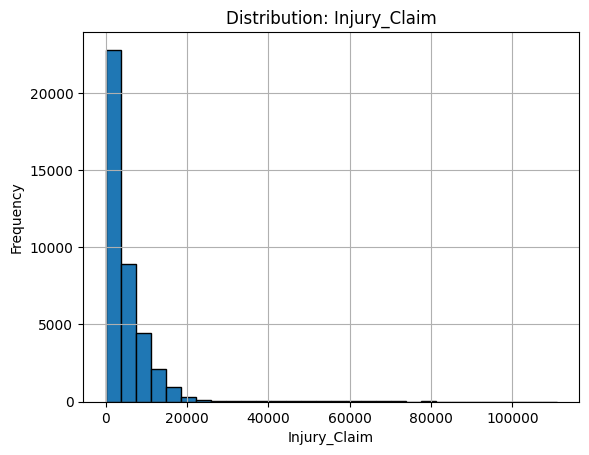

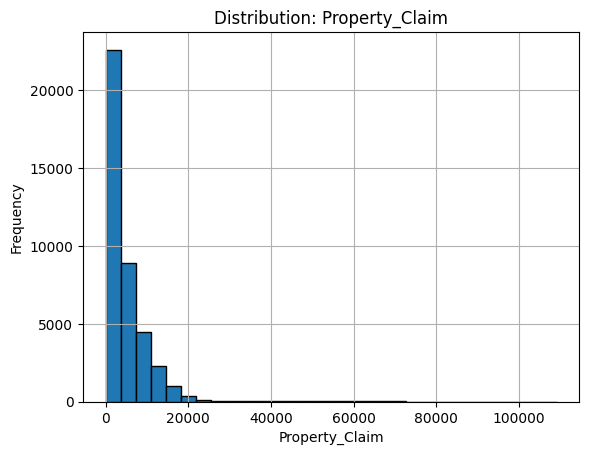

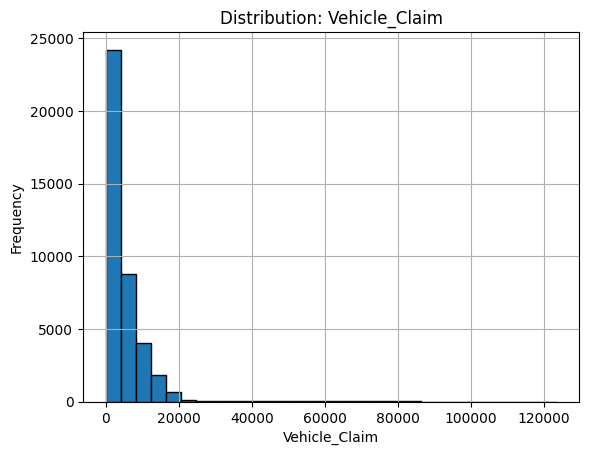

In [9]:
# -----------------------------
# 6. Numerical Feature Distribution
# -----------------------------
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# 6. Numerical Feature Distribution (Safe alternative using matplotlib)
for col in numerical_cols:
    if col != 'Fraud_Ind':
        plt.hist(df[col].dropna(), bins=30, edgecolor='black')
        plt.title(f'Distribution: {col}')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()



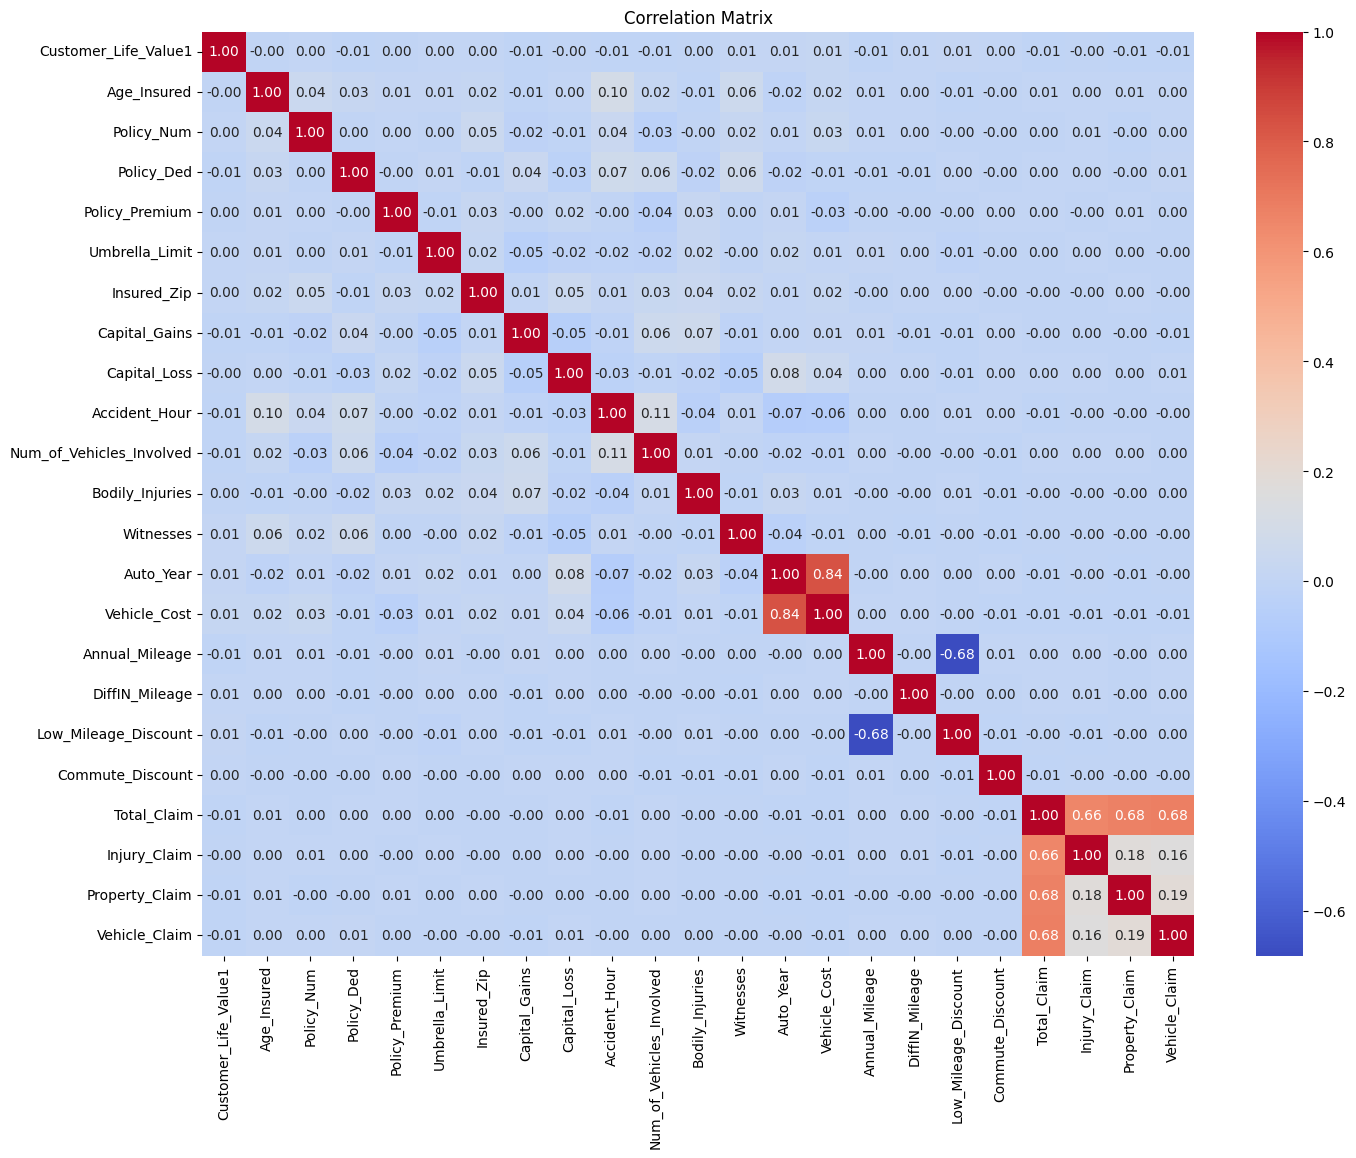

In [ ]:
# -----------------------------
# 7. Correlation Matrix
# -----------------------------
if len(numerical_cols) > 1:
    corr_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()



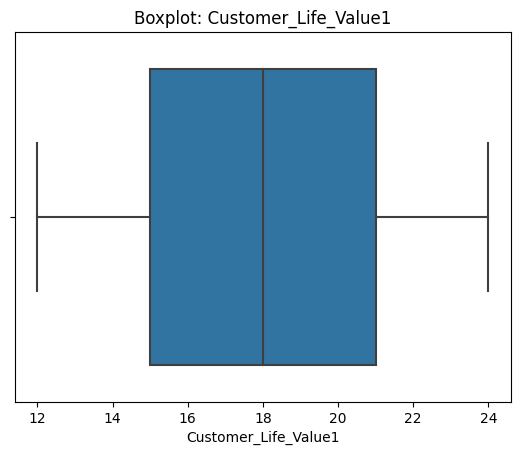

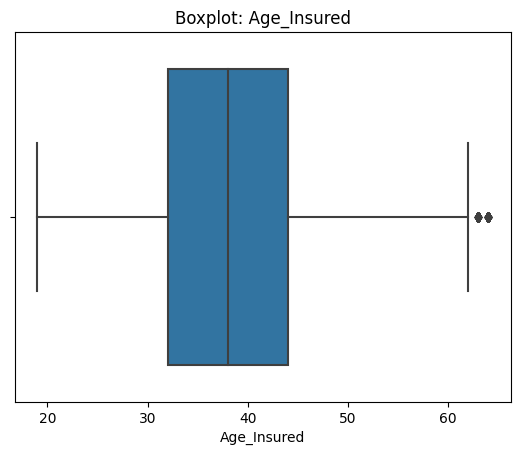

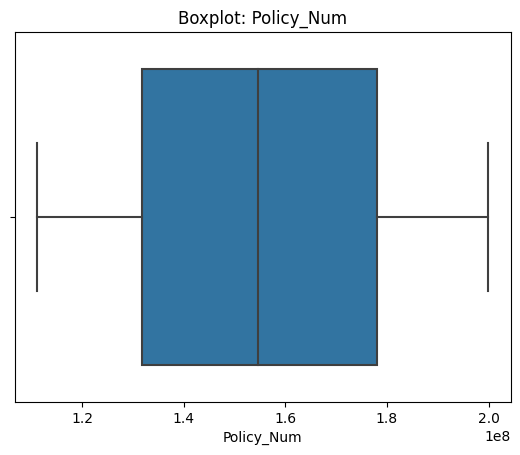

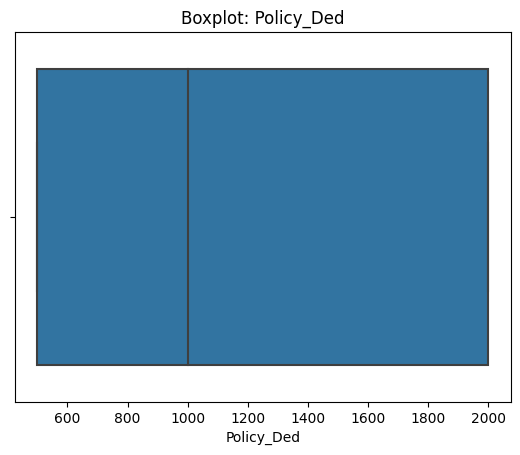

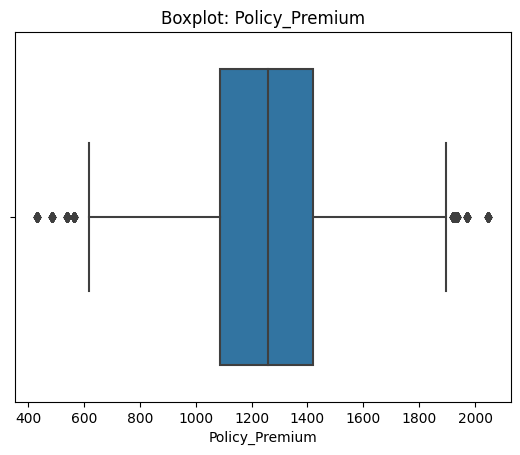

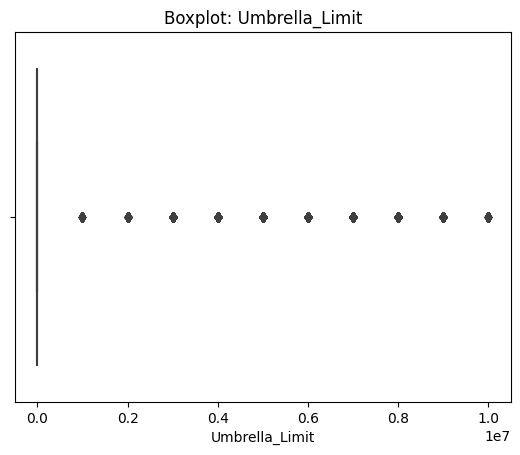

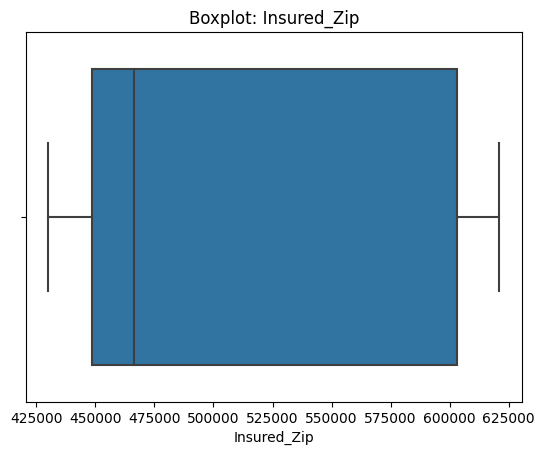

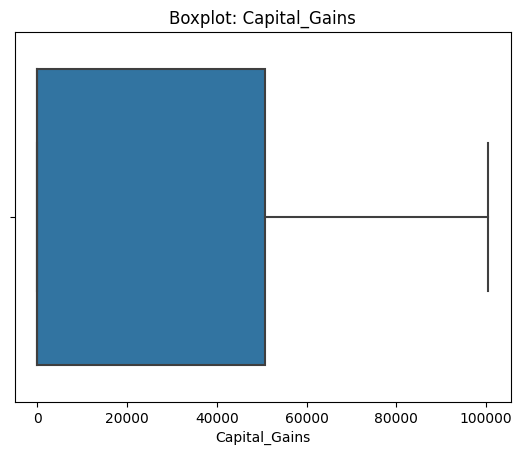

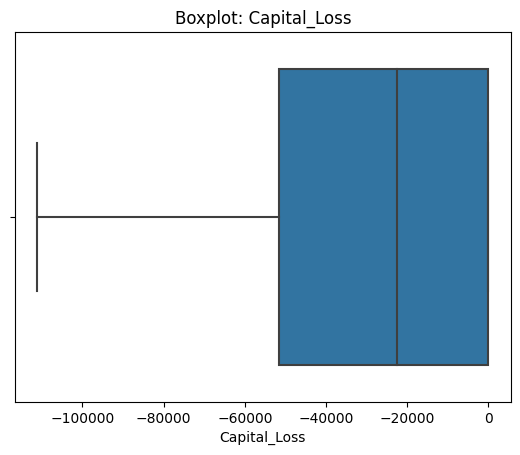

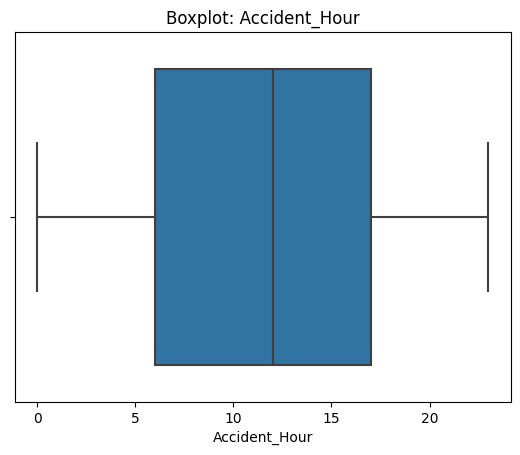

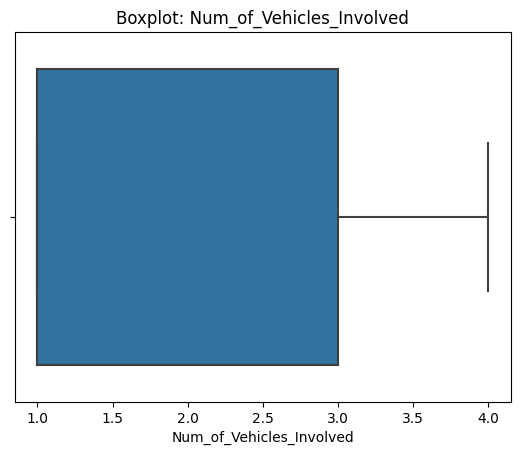

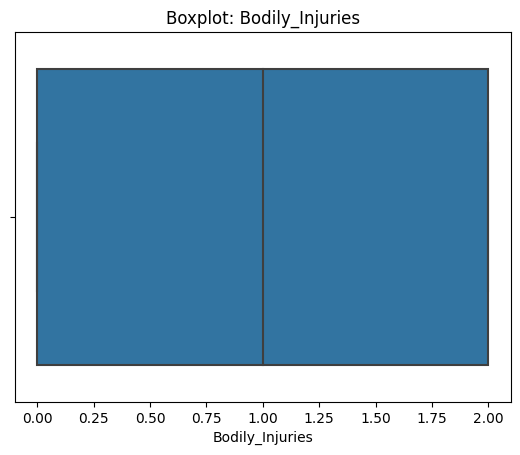

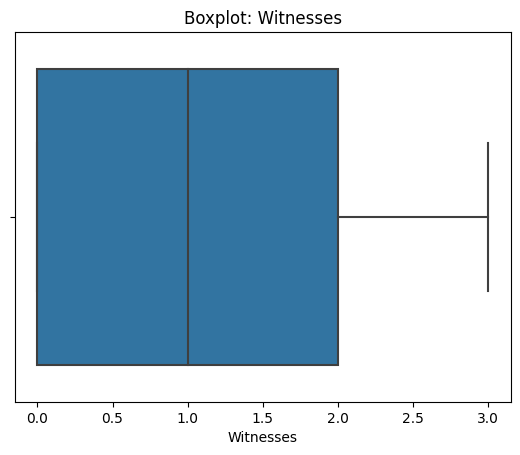

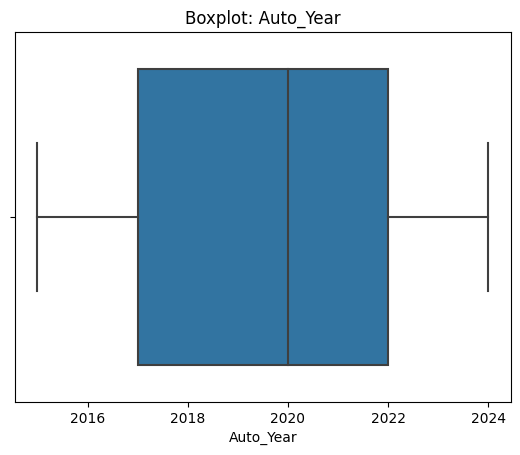

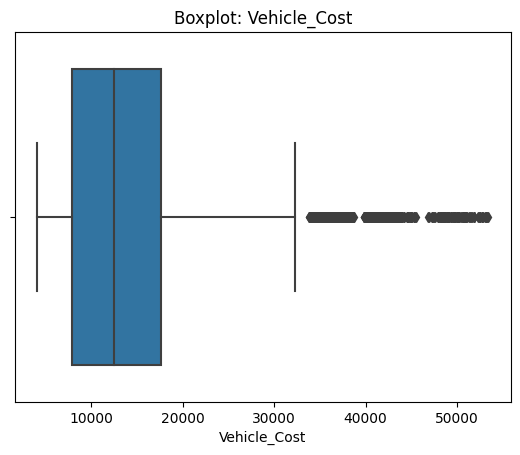

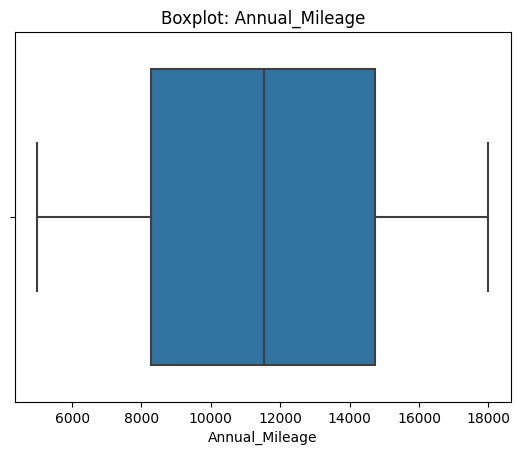

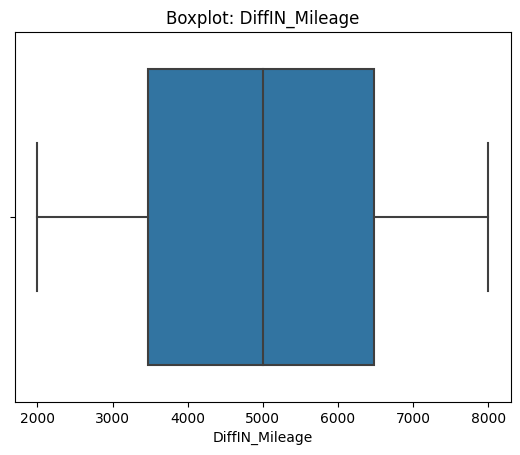

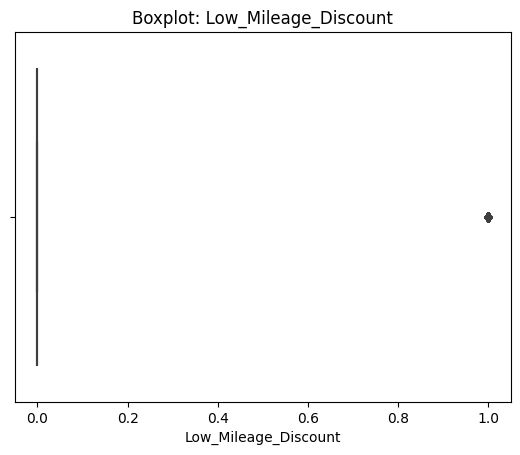

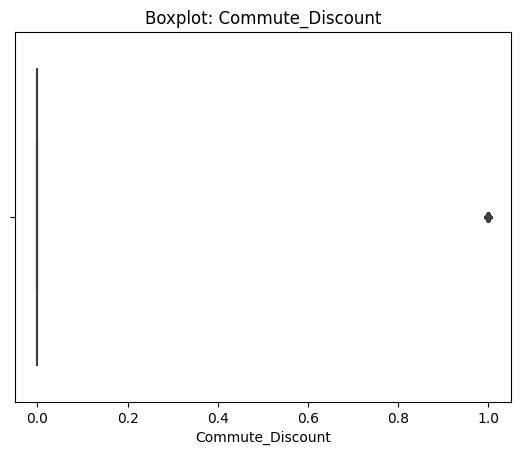

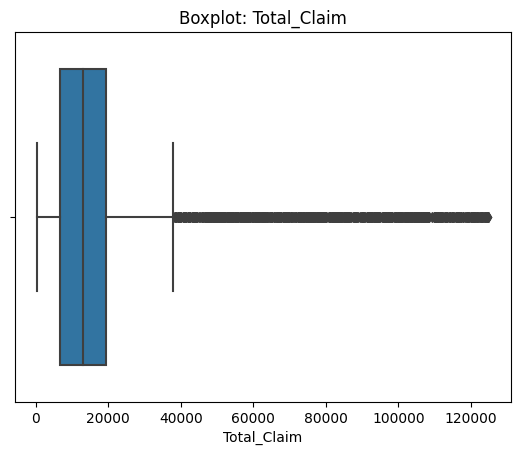

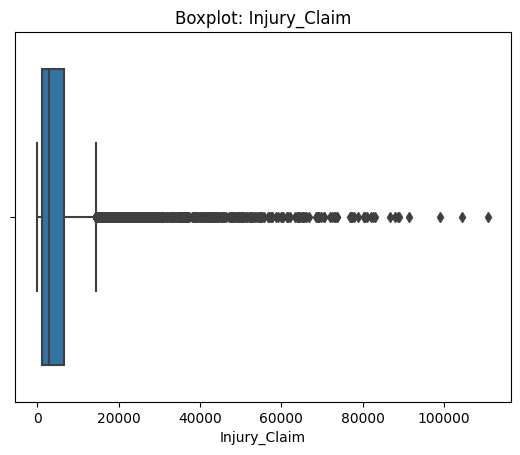

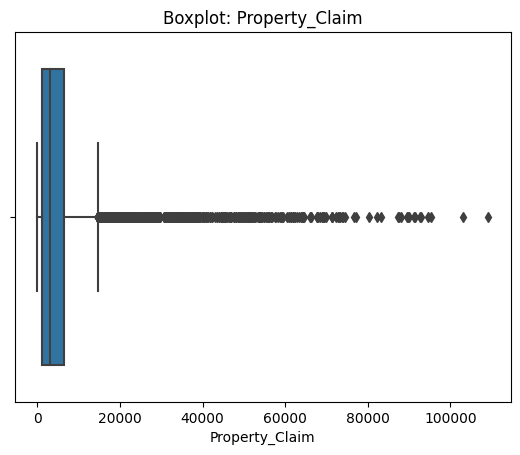

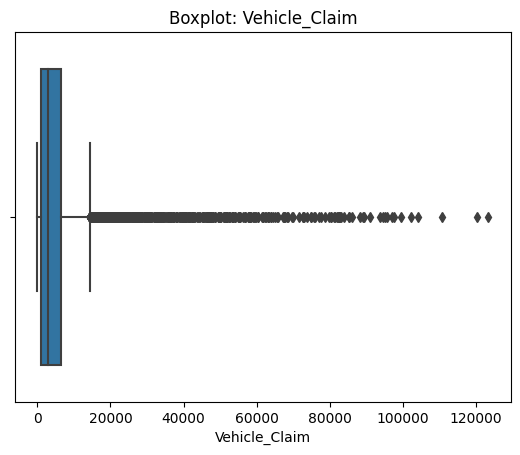

In [ ]:
# -----------------------------
# 8. Outlier Detection (Box Plots)
# -----------------------------
for col in numerical_cols:
    if col != 'Fraud_Ind':
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot: {col}')
        plt.show()
